In [5]:
pip install wooldridge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 19.1 MB/s eta 0:00:00


In [6]:
import pandas as pd
import wooldridge as wd
import numpy as np

In [138]:
actividad_1 = pd.read_csv("/content/activity_1_ml.csv")

In [139]:
actividad_1

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,MARRIED,2
1,3.50,0,2,female,alone,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
547,3.00,0,9,male,NaN,0
548,7.63,0,8,female,single,4
549,4.50,0,36,female,married,6
550,NaN,0,28,male,married,3


### Busqueda de problemas
#### Duplicados

In [140]:
actividad_1.duplicated().sum()

17

In [141]:
actividad_1.drop_duplicates(inplace=True)                      #inplace guarda los cambios
actividad_1.reset_index(drop=True, inplace=True)               #reinicia el indice

In [142]:
actividad_1.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
530    False
531    False
532    False
533    False
534    False
Length: 535, dtype: bool>

In [143]:
actividad_1.duplicated().sum()

0

In [144]:
actividad_1

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,MARRIED,2
1,3.50,0,2,female,alone,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
530,2.90,0,1,male,single,2
531,3.25,0,14,female,married,2
532,7.63,0,8,female,single,4
533,NaN,0,28,male,married,3


In [145]:
actividad_1["GENDER"].unique()

array(['male', 'female', 'MALE', 'FEMALE', 'man', 'woman', nan],
      dtype=object)

Crea el caso para un ejemplo de duplicados implicitos

In [146]:
def funcion1(row):
  gen=row["GENDER"]
  if gen=="female":
    return np.random.choice(["female","FEMALE","woman"])
  return np.random.choice(["male","man","MALE"])

actividad_1["gender_problems"] = actividad_1.apply(funcion1,axis=1)

In [147]:
dictio_correct={"woman":"female",
                "FEMALE":"female",
                "man":"male",
                "MALE":"male",
                "female":"female",
                "male":"male"}

In [148]:
actividad_1["gender_problems"]=actividad_1["gender_problems"].map(dictio_correct)

In [149]:
actividad_1["gender_problems"].unique()

array(['male', 'female'], dtype=object)

In [150]:
actividad_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WAGE             474 non-null    float64
 1   EDUC             535 non-null    int64  
 2   EXPER            535 non-null    int64  
 3   GENDER           532 non-null    object 
 4   FAM_STATUS       454 non-null    object 
 5   TENURE           535 non-null    int64  
 6   gender_problems  535 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 29.4+ KB


In [151]:
actividad_1["FAM_STATUS"].unique()

array(['MARRIED', 'alone', 'single', 'married', nan, 'SINGLE'],
      dtype=object)

In [152]:
def funcion1(row):
  FAM=row["FAM_STATUS"]
  if FAM=="married":
    return np.random.choice(["married","MARRIED"])
  return np.random.choice(["SINGLE","single","alone"])

actividad_1["FAM_problems"] = actividad_1.apply(funcion1,axis=1)

In [159]:
dictio_correctFAM={"married":"married",
                "MARRIED":"married",
                "SINGLE":"single",
                "alone":"single",
                "single":"single"}

In [160]:
actividad_1["FAM_problems"]=actividad_1["FAM_problems"].map(dictio_correctFAM)

In [161]:
actividad_1["FAM_problems"].unique()

array(['single', 'married'], dtype=object)

In [162]:
actividad_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WAGE             474 non-null    float64
 1   EDUC             535 non-null    int64  
 2   EXPER            535 non-null    int64  
 3   GENDER           532 non-null    object 
 4   FAM_STATUS       454 non-null    object 
 5   TENURE           535 non-null    int64  
 6   gender_problems  535 non-null    object 
 7   FAM_problems     535 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 33.6+ KB


In [163]:
actividad_1

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE,gender_problems,FAM_problems
0,10.00,0,3,male,MARRIED,2,male,single
1,3.50,0,2,female,alone,0,female,single
2,3.30,0,5,female,single,0,female,single
3,5.00,0,15,male,married,5,male,married
4,11.25,0,28,male,married,25,male,married
...,...,...,...,...,...,...,...,...
530,2.90,0,1,male,single,2,male,single
531,3.25,0,14,female,married,2,female,married
532,7.63,0,8,female,single,4,female,single
533,NaN,0,28,male,married,3,male,married


In [164]:
actividad_1.isna().sum()

WAGE               61
EDUC                0
EXPER               0
GENDER              3
FAM_STATUS         81
TENURE              0
gender_problems     0
FAM_problems        0
dtype: int64

In [176]:
actividad_1["FAM_STATUS"] = np.random.choice(["i", np.nan], size=len(actividad_1), p=[0.9, 0.1])

In [177]:
actividad_1

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE,gender_problems,FAM_problems
0,10.00,0,3,male,i,2,male,single
1,3.50,0,2,female,i,0,female,single
2,3.30,0,5,female,i,0,female,single
3,5.00,0,15,male,i,5,male,married
4,11.25,0,28,male,i,25,male,married
...,...,...,...,...,...,...,...,...
530,2.90,0,1,male,nan,2,male,single
531,3.25,0,14,female,i,2,female,married
532,7.63,0,8,female,i,4,female,single
533,NaN,0,28,male,i,3,male,married


VISUALIZACION

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [181]:
actividad_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WAGE             474 non-null    float64
 1   EDUC             535 non-null    int64  
 2   EXPER            535 non-null    int64  
 3   GENDER           532 non-null    object 
 4   FAM_STATUS       535 non-null    object 
 5   TENURE           535 non-null    int64  
 6   gender_problems  535 non-null    object 
 7   FAM_problems     535 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 33.6+ KB


In [63]:
actividad_1

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE,gender_problems,FAM_problems
0,10.00,0,3,male,MARRIED,2,male,single
1,3.50,0,2,female,alone,0,female,single
2,3.30,0,5,female,single,0,female,single
3,5.00,0,15,male,married,5,male,married
4,11.25,0,28,male,married,25,male,married
...,...,...,...,...,...,...,...,...
529,6.46,0,27,man,married,0,male,married
530,2.90,0,1,male,single,2,male,single
531,3.25,0,14,female,married,2,female,married
532,7.63,0,8,female,single,4,female,single


Gráficos de barras

In [184]:
gen = actividad_1['gender_problems'].value_counts() #construir una tabla de frecuencias
gen.index = ['m', 'f']

In [185]:
gen

m    303
f    232
Name: gender_problems, dtype: int64

<BarContainer object of 2 artists>

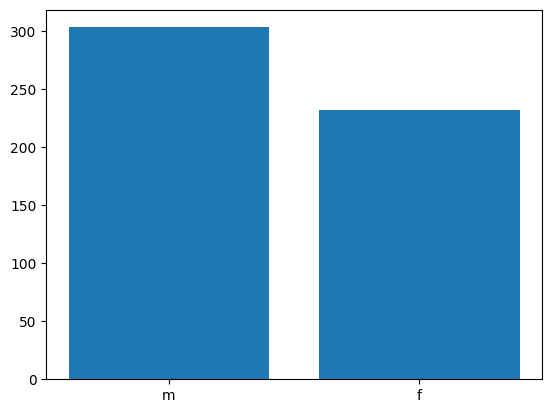

In [188]:
plt.bar(gen.index, gen.values)

<ipython-input-190-6e5cf4018ccf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gen.index, y=gen.values, palette="viridis")


<Axes: xlabel='None'>

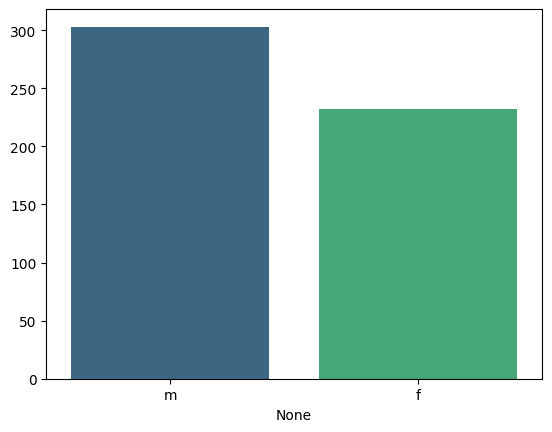

In [190]:
sns.barplot(x=gen.index, y=gen.values, palette="viridis")

Barras agrupadas

In [194]:
actividad_1['FAM_problems'] = pd.cut(actividad_1['WAGE'], 2, labels=['single', 'married'])

In [195]:
actividad_1['FAM_problems']

0      single
1      single
2      single
3      single
4      single
        ...  
530    single
531    single
532    single
533       NaN
534    single
Name: FAM_problems, Length: 535, dtype: category
Categories (2, object): ['single' < 'married']

In [200]:
actividad_12 = actividad_1.replace({'gender_problems':{1:'f',0:'m'}})

In [201]:
actividad_1['gender_problems'].value_counts()

male      303
female    232
Name: gender_problems, dtype: int64

In [206]:
pivot = actividad_1.pivot_table(values='WAGE',
                 index='FAM_problems',
                 columns='gender_problems',
                 aggfunc='mean').stack().to_frame().reset_index().rename(columns={0:'mean_wage','gender_problems':'gender'})

In [207]:
pivot

,FAM_problems,gender,mean_wage
0,single,female,4.300676
1,single,male,6.217020
2,married,female,15.860000
3,married,male,18.098421


<Axes: xlabel='FAM_problems', ylabel='mean_wage'>

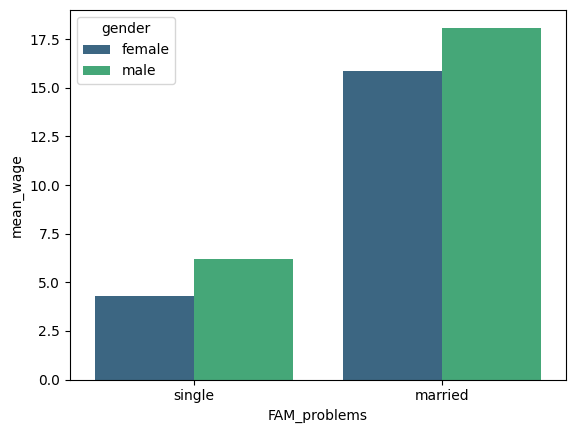

In [209]:
sns.barplot(data=pivot, x='FAM_problems',y='mean_wage',hue='gender',palette="viridis")

<Axes: xlabel='gender_problems'>

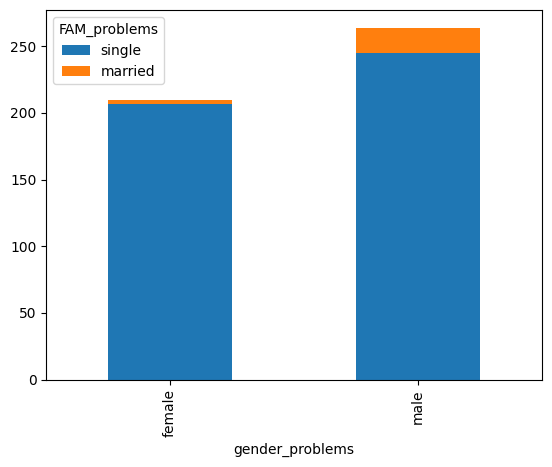

In [218]:
(actividad_1.groupby(['FAM_problems','gender_problems'])['WAGE']
 .count()
 .reset_index()
 .pivot(index='gender_problems',values='WAGE',columns='FAM_problems')
 .plot(kind='bar',stacked=True))

In [217]:
!pip install wbgapi #instalando una librería del banco mundial
import wbgapi as wb #importando la librería del banco mundial

Heatmaps

<Axes: >

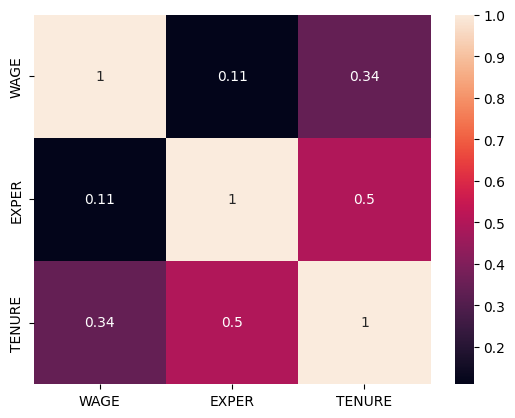

In [223]:
#esto también es conocido como correlograma
df = actividad_1[['WAGE','EXPER','TENURE']]
sns.heatmap(df.corr(), annot=True)

In [221]:
actividad_1

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE,gender_problems,FAM_problems
0,10.00,0,3,male,i,2,male,single
1,3.50,0,2,female,i,0,female,single
2,3.30,0,5,female,i,0,female,single
3,5.00,0,15,male,i,5,male,single
4,11.25,0,28,male,i,25,male,single
...,...,...,...,...,...,...,...,...
530,2.90,0,1,male,nan,2,male,single
531,3.25,0,14,female,i,2,female,single
532,7.63,0,8,female,i,4,female,single
533,NaN,0,28,male,i,3,male,NaN


distribución

<Axes: xlabel='WAGE', ylabel='Count'>

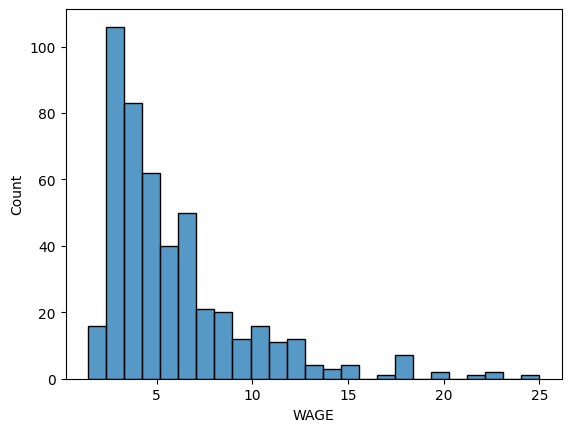

In [238]:
sns.histplot(x=actividad_1['WAGE'])

<Axes: xlabel='WAGE', ylabel='Count'>

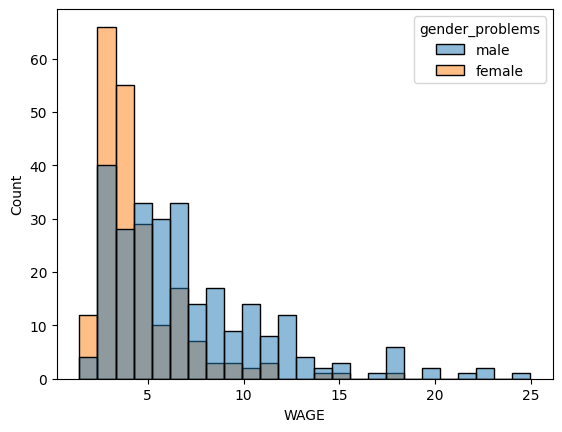

In [241]:
sns.histplot(data=actividad_1, x='WAGE', hue='gender_problems')

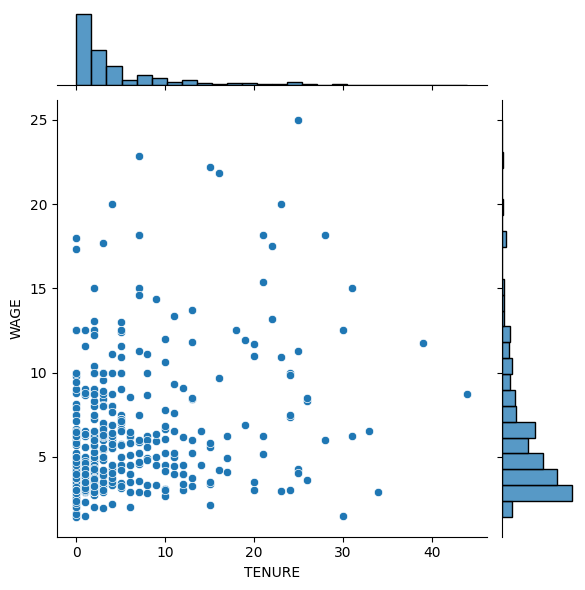

In [242]:
sns.jointplot(y=df['WAGE'],x=df['TENURE'])

<ipython-input-243-ab6663eb7ebe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_problems'] = actividad_1['gender_problems']


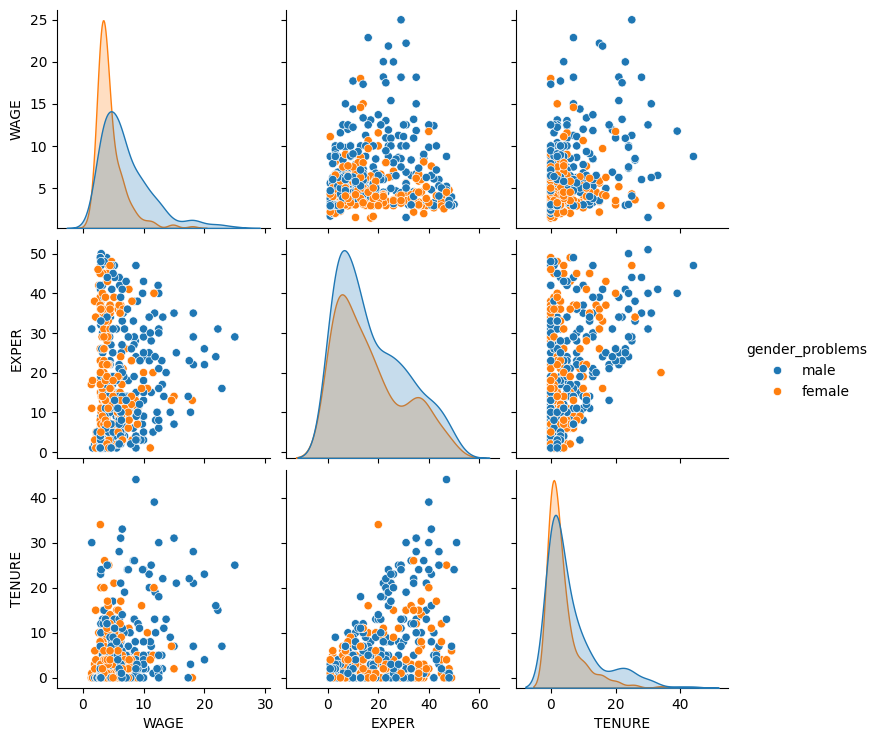

In [243]:
#esto es también conocido como correlograma
df['gender_problems'] = actividad_1['gender_problems']
sns.pairplot(df, hue='gender_problems')

<Axes: xlabel='FAM_problems', ylabel='WAGE'>

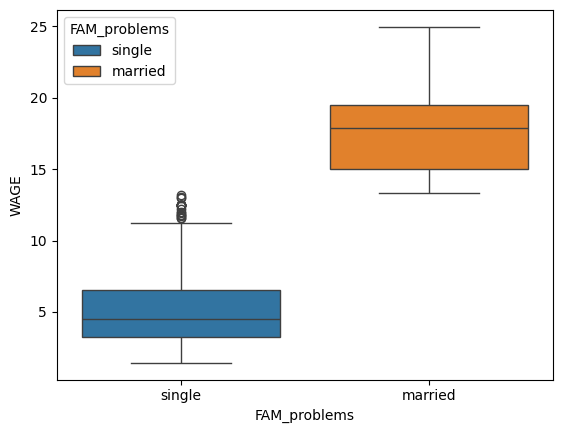

In [245]:
sns.boxplot(data=actividad_1, x='FAM_problems', y='WAGE', hue='FAM_problems')